# PyCaret Tutorial Notebook

We are into the **3rd week** of the **Fundamentals of MLOps: A Hands-On Approach**, where we will learn how to efficiently create & experiment with ML Pipelines using a low-code framework called PyCaret.

This tutorial is intended to familiarize you with some of the functionality offered by PyCaret using a _regression_ example (we will use the `pycaret.regression` module in this tutorial). Most of the functions (with a few parameter tweaks) can be extended to other modules as well *(you will explore the `pycaret.classification` module in this week's assignment)*.



# Installation of PyCaret

The first step to get started with PyCaret is to install PyCaret. It can be done as follows:

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 8.2MB/s 
     |████████████████████████████████| 276kB 13.2MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 112kB 15.8MB/s 
     |████████████████████████████████| 174kB 15.0MB/s 
     |████████████████████████████████| 2.0MB 17.0MB/s 
     |████████████████████████████████| 14.2MB 216kB/s 
     |████████████████████████████████| 1.4MB 42.9MB/s 
     |████████████████████████████████| 1.7MB 29.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 51.3MB/s 
     |████████████████████████████████| 6.8MB 35.9MB/s 
     |████████████████████████████████| 1.1MB 23.9MB/s 
     |████████████████████████████████| 153kB 41.6MB/s 
     |████████████████████████████████| 81kB 13.5MB

# Dataset for the Tutorial

For this tutorial we will use a dataset of **superconductive materials**. You can download the data (`material_superconductivity.csv`) for this tutorial from [here](https://drive.google.com/file/d/14IHViGEmrRPvXxW4tSHV4lXew3A-GuFU/view?usp=sharing) and load it using `pandas`.


_**Note:** It is a slightly **modified** version of the original [*Superconductivity Data Set*](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data)._ 




---

The goal of this tutorial is to __develop a ML model which can predict the *critical temperature* (`critical_temp`) of a superconductor__ given a set of various properties of the superconducing material.



In [6]:
import pandas as pd
df = pd.read_csv("./data/superconductivity/train.csv")

Since we do not have an explicit test dataset for our trained model to predict results on, we will use 10% of the total datapoints as our _unseen_ test dataset, while the remaining 90% will be used for our training & validation purposes. 

In [13]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
data = df =  df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (13951, 82)
Unseen Data For Predictions: (1550, 82)


In [11]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
4,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
5,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0


_**Note:** Here, we are using an external dataset & have loaded it using `pandas`. PyCaret also has a [repository of datasets](https://pycaret.org/get-data/#datasets) which can be used for model training & experimentation involving various different tasks. These datasets can be loaded as `pandas` DataFrame using:_

```
dataset_name = "name of pycaret dataset"           # Eg: "ipl", "bike", etc.
data = get_data(dataset_name)
```

# Basic PyCaret

This section intends to familiarize you with the building blocks of PyCaret that are used to develop a simple end-to-end ML pipeline. In this section, we will look at the following:
* PyCaret environment setup
* Comparison of model algorithms
* Training & Fine-Tuning a model
* Evaluation of a model through plots
* Making predictions using trained model
* Saving & loading a model

## Environment Setup

We need to configure the environment before we begin any machine learning experiment in PyCaret. Depending on the sort of experiment we wish to run, one of the six presently supported modules must be loaded into our Python environment.


To begin with, we import all the functions from the `pycaret.regression` module.

In [12]:
from pycaret.regression import *

Now, we use the `setup(...)` function to initialize the environment of our ML experiment. It the first & only mandatory setp to begin any ML experiment, and is common to all the 6 modules.

Apart from defining the dataset (using `data`) & the target variable to be predicted (using `target` - *this holds for all modules except clustering & anomaly detection*), the `setup(...)` function offers a wide range of functionalities. In this *Basic PyCaret* section, we will understand at the following functionalties:

* **Reproduciblity:** The `session_id` controls the randomness of experiment. If set to a non-`None` value (say, `42`, as in our case), it can be used for later reproducibility of the entire experiment.
* **Dataset Splitting:** `train_size` is used to determine the size of the dataset used for training our models during the experiment. By default 0.7 (or 70%) of the dataset is used for training, while the remaining is *held-out* for validation in the end.
* **Data Type Inference:** PyCaret automatically tries to infer the numeric & categorical variables form the dataset when`setup(...)` is executed, & allows you to confirm them. 
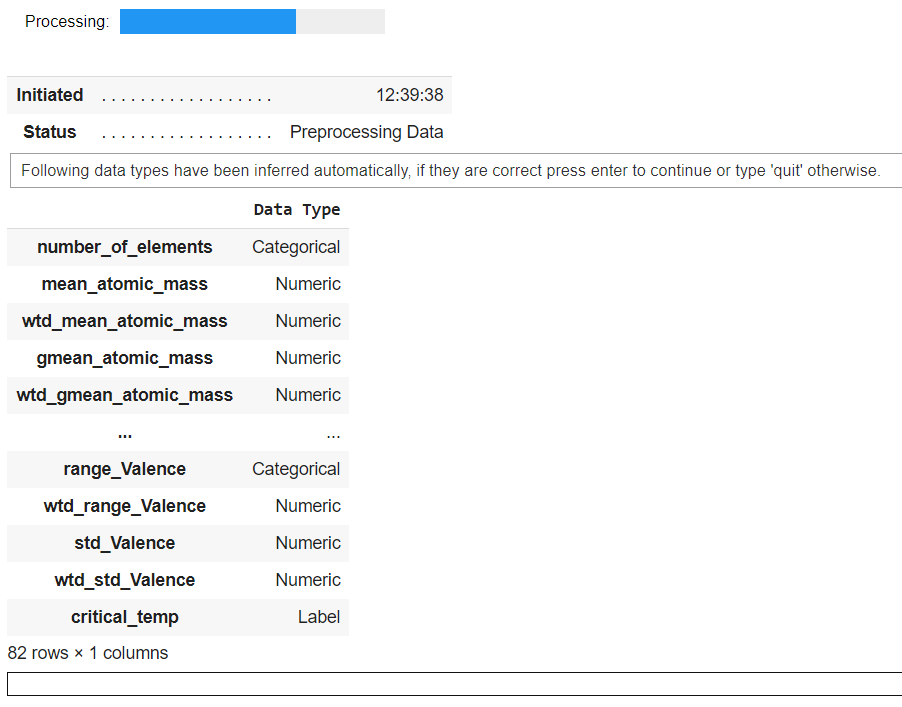

  However, one can override these by typing "quit" in the textbox & later specifying the respective columns names as arguments for `categorical_features` & `numeric_features` (we don't need these for our case though). Columns that need not be considered for the ML task can be excluded by specifying them as `ignore_features` (here, since the `material` column contains unique values for each instance & doesn't aid in the task, we can ignore it).
* **Missing Value Imputation:** This is one of the preprocessing steps that can be done elegantly using PyCaret just by specifying the type of values that should replace the missing values in any column. They type of imputation for categorical data is specified using `categorical_imputation` (`'constant'` by default), while that for numeric data is specified using `numeric_imputation` (`'mean'` by default).
* **Categorical Encoding:** By default, PyCaret handles the conversion of categorical features (inferred or specified explicitly) into numeric values using the *One-Hot-Encoding* scheme. This implicitly creates dummy features corresponding to the original categorical features in our dataset.

There are a bunch of other data preprocessing & transformation steps that can be specified to be orchestrated into our pipeline using the `setup(...)` function. We will explore them in the *Intermediate PyCaret* section.

In [14]:
expt_basic = setup(
    data = df, 
    target = 'critical_temp', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    ignore_features=["material"],
    numeric_imputation="median",        # "mean" by default
    categorical_imputation="mode",      # "constant" (not_available) by default
)

OSError: dlopen(/Users/jimmy/anaconda3/envs/LLMExperiments/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): tried: '/Users/jimmy/anaconda3/envs/LLMExperiments/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/jimmy/anaconda3/envs/LLMExperiments/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so' (no such file), '/Users/jimmy/anaconda3/envs/LLMExperiments/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

This completes the environment setup for our experiment, with all the necessary preprocessing, transformation & feature engineeering steps piped together to be applied to our dataset for training of our ML models. All the details of our environment are displayed in the table above.

## Model Comparison

We are now set to experience the true power of *low-code* machine learning, when we train & compare a multitude of models with just a single line of code.

But prior to that, let us inspect all the algorithms that PyCaret's `regression` module offers us. This can be done using `models()`, as shown below. The output is a table of models available in model library for the particular module, along with the *reference* to the actual underlying implementation.

The *Turbo* column indicates the algorithms that are usually able to run in a shorter duration (indicated if Turbo is `True`) & are chosen by default for the comparison.

*__Note:__ `model()` can be used with other modules as well to inspect the various algorithms available for those tasks*

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


With this background, we can proceed towards comparing the various algorithms & evaluate their performance before zeroing down on the final model that we will eventually use.

The `compare_models()` function **(just 2 words!)** trains and evaluates performance of all estimators available in the model library using k-fold cross validation *(on the training split of the dataset)*. The output prints a score grid that shows average metric scores across the `k` folds of validation, along with training time.

In our case below, this simple function (with some parameters, of course, which we will discuss next) is able to train & evaluate 10+ algorithms without the user having to write code for any specific algorithm!

Following is the explanation of the parameters that `compare_models()` can take:
* **`sort`:** By default, the output grid is sorted in descending order of the R2 metric (higher R2 is better). This can be changed to any other metric by specifying it as `sort`. In our case, we sort the grid by RMSE (lower RMSE is better).
* **`include`:** This is used to explicitly enlist the algorithms that we wish to train & compare.
* **`exclude`:** This is used to enlist the algorithms that we do not wish to train or compare. Here, we have excluded 5 algorithms because they seemed to take a lot of time, & did not give good results.
* **`fold`:** This is basically the `k` in k-Fold Cross Validation. By default, `k=10`, but it can be changed as per convenience.
* **`turbo`:** We saw previously that some algorithms have `Turbo = True` (usually faster algorithms). By default, `turbo=True`, which includes only these faster algorithms to be compared & evaluated. However, it can be set to `False` to include all the other models as well.

`compare_models()` return the best performing model based on `sort` order unless we specify the number of top performing models to be returned using the `n_select` parameter (we will use this in the *Intermediate PyCaret* section).


In [ ]:
best = compare_models(sort="RMSE", exclude=["lar", "rf", "et", "gbr", "ada"], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.7053,113.4606,10.6463,0.9037,0.4989,9.0818,1.208
knn,K Neighbors Regressor,7.5609,175.0485,13.2177,0.8516,0.5174,8.3847,0.452
dt,Decision Tree Regressor,7.1429,187.9618,13.6975,0.8405,0.5165,7.6383,0.906
ridge,Ridge Regression,14.2936,347.1825,18.6294,0.7052,0.8754,14.6673,0.026
br,Bayesian Ridge,14.2983,347.3928,18.6350,0.7050,0.8738,14.2653,0.164
lr,Linear Regression,14.3182,348.1571,18.6556,0.7043,0.8793,14.6963,0.474
en,Elastic Net,14.9925,376.1511,19.3914,0.6806,0.9120,20.0117,0.274
lasso,Lasso Regression,15.0233,377.6577,19.4303,0.6793,0.9110,20.1200,0.268
omp,Orthogonal Matching Pursuit,16.5008,443.5972,21.0579,0.6234,0.9436,26.2129,0.028
huber,Huber Regressor,17.4946,519.1853,22.7831,0.5592,0.9496,24.5486,0.782


## Model Creation & Fine-Tuning

Once we perform a comparative analysis of the various available models, we can choose the best-performing algorithm & train it on our dataset. This can be done using `create_model(...)`, which is perhaps the most granular function in PyCaret.

Given the id of the model to be created (here, `"lightgbm"`), this function trains & evaluates the corresponding model for us. By default, it uses a 10-fold cross validation. Number of folds can be changed with the `fold` parameter, & cross-validation can be totally avoided if we set `cross_validation=False`.

If needed, other model-specific parameters can also be set while calling this function. These parameters can be found in the *reference* of the corresponding models (Example: `max_depth` for xgboost, `learning_rate` for lightgbm, etc.)

In [ ]:
lgbm = create_model("lightgbm", fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.8344,126.3321,11.2398,0.8940,0.5226,13.8306
1,6.7972,113.1294,10.6362,0.9056,0.4874,1.2830
2,6.5400,104.4271,10.2190,0.9117,0.4969,10.6841
3,6.6852,121.6496,11.0295,0.8923,0.5055,12.6763
4,6.3071,100.5768,10.0288,0.9085,0.4885,23.3895
5,6.7048,105.6652,10.2794,0.9087,0.4920,1.1607
6,6.8755,129.7889,11.3925,0.8944,0.4816,1.3610
7,6.7249,106.4520,10.3176,0.9115,0.5337,23.7443
8,6.7539,115.1639,10.7314,0.9001,0.4960,0.9899
9,6.6179,101.2943,10.0645,0.9178,0.4927,1.7183


When a model is built with the `create_model()` method, it is trained using the default hyperparameters. The `tune_model()` method is used to now tune the hyperparameters of this created model such that a particluar metric is optimized specifically. It uses *Random grid search* using pre-defined grids that are totally configurable to modify the hyperparameter of the model provided as an estimator *(for now, we will use the random grid, & explore the customization in the next section)*.

Again, tuning is done using k-Fold Cross Validation, where `k` can be set using `fold` parameter. The metric to optimize the hyperparameters with respect to is specified using `optimize`.

In [ ]:
tuned_lgbm = tune_model(lgbm, fold=5, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.4884,113.3398,10.6461,0.9052,0.4981,6.6217
1,6.3793,107.5357,10.3699,0.9070,0.4996,10.4792
2,6.2171,96.1899,9.8076,0.9148,0.4796,11.1850
3,6.5189,112.1177,10.5886,0.9079,0.4837,13.3632
4,6.4482,104.1701,10.2064,0.9127,0.4836,1.3184
Mean,6.4104,106.6707,10.3237,0.9095,0.4889,8.5935
SD,0.1074,6.1805,0.3021,0.0036,0.0082,4.2388


As you can see, the RMSE value has improved from 10.5939 to 10.3237 after fine-tuning.

We can print out both the untuned & tuned LightGBM models to check the difference in hyperparameters.

In [ ]:
print(lgbm, "\n")
print(tuned_lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
              random_state=42, reg_alpha=0.001, reg_lambda=5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Plotting the Model Characteristics

Analyzing the performance of a trained ML model is an essential part of any ML workflow. In PyCaret, this can be simply done with the `plot_model(...`) function. The function accepts a trained model object and the kind of plot (`plot` parameter) as strings. There are several kinds of plots that one can plot based on the PyCaret module they are working with. Details about all these types of plots can be found in [this documentation](https://pycaret.org/plot-model/).

For our regression task, we plot the residuals, the learning curve (to understand how the performance has evolved with training) & the relative feature importances in our trained model.

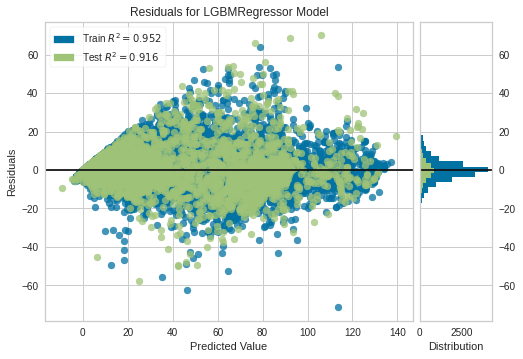

In [ ]:
plot_model(tuned_lgbm, plot="residuals")

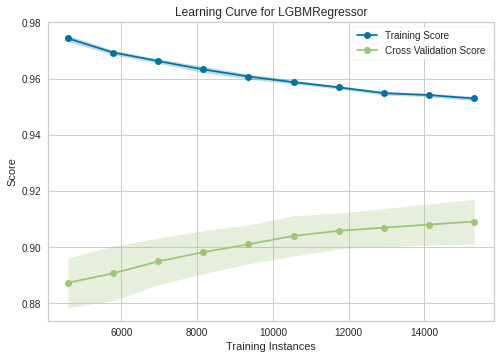

In [ ]:
plot_model(tuned_lgbm, plot="learning")

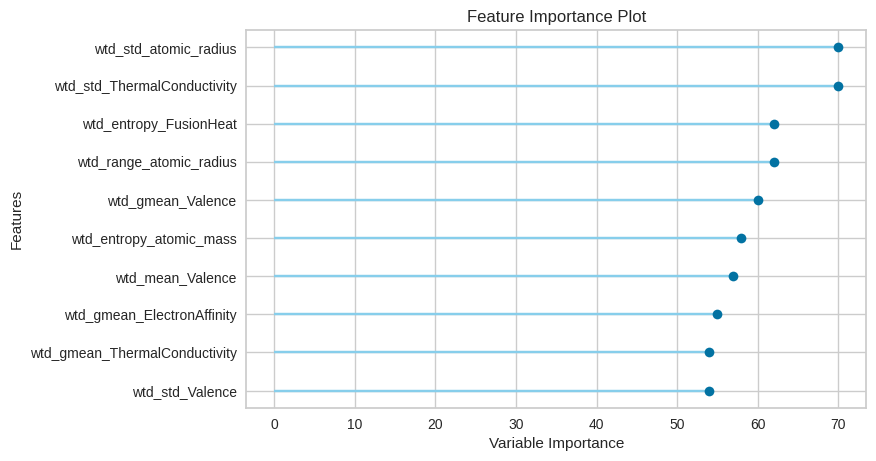

In [ ]:
plot_model(tuned_lgbm, plot="feature")              # Top 10 most important features
# plot_model(tuned_lgbm, plot="feature_all")        # All features used in the model

Another technique for evaluating model performance is to use the `evaluate_model()` function, which provides a user interface for all possible plots for a particular model *(it makes use of the `plot_model()` method internally)*.

## Prediction on Validation / Hold-out Sample

If you recall, while setting up our environment, we split our data into 80-20 (training & validation data) explicitly. Till now, the training & fine-tuning was done on the training portion of that data (17010 samples). 

Now, once we've fine-tuned our model, it is a good idea to predict the results on our held-out validation dataset (4253 samples) & check the performance metrics on this set.

For this, we use the `predict_model(...)` function & pass it our trained model object. Since we do not specify any dataset explicitly, we mean to predict on the validation dataset that was held out at the time of setting up our environment.

In [ ]:
predict_model(tuned_lgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6.2684,96.4005,9.8184,0.9163,0.4909,2.1346


We can compare these values obtained with the results of our fine-tuned model. Note that we should take into account the standard deviation of the metrics in our fine-tuned model while comparing against these results.

## Saving & Loading a Model

Once we have trained our model in this experiment, we need to save it so that it can be used in future for making predictions.

A model can be saved easily using the `sace_model(...)` function, which takes in the model object & the file name. The model, along with its entire transformation pipeline (preprocessing, etc. to be applied to the raw dataset) is saved as a `.pkl` (pickle) file.

In [ ]:
save_model(tuned_lgbm,'lgbm_expt1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['material'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='critical_temp',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.2,
         

Any saved model can be loaded in the same or alternate environment using the `load_model(...)` function by passing in the file name.

In [ ]:
saved_model = load_model('lgbm_expt1')

Transformation Pipeline and Model Successfully Loaded


## Prediction on Unseen Test Data

Now, we will use this loaded model to make predictions on our actual unseen test data (10% of the original dataset), which we had set aside initially. 

Again, we use the `predict_model(...)` function, but this time we pass in the unseen data in the `data` parameter as well. 

Since our loaded model contains the entire transformation pipeline as well, all the necessary preprocessing steps are automatically applied to this passed dataset before predictions are actually made.

In [ ]:
unseen_predictions = predict_model(saved_model, data=data_unseen)
unseen_predictions.head()

,material,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,...,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,Label
0,Ge1Nb3,2.0,82.768190,87.837285,82.144935,87.360109,0.685627,0.509575,20.27638,51.522285,10.138190,8.779930,711.80,687.700000,710.166178,686.488365,0.690853,0.589409,96.4,307.700000,48.200000,41.742424,161.500000,179.750000,157.321327,176.492557,0.667386,0.461943,73.0,117.250000,36.500000,31.609927,6946.500000,7758.250000,6754.118003,7608.074085,0.665582,NaN,3247.000,5096.750000,...,102.741423,94.869113,0.680597,0.622557,32.90,35.575000,16.450000,14.246118,29.3000,28.050000,29.193150,27.970992,0.689503,0.596157,5.000,12.150000,2.500000,2.165064,57.000000,55.500000,56.920998,55.441265,0.691761,0.583527,6.00000,25.500000,3.000000,2.598076,4.50,4.750000,4.472136,4.728708,0.686962,0.514653,1.0,2.750000,0.500000,0.433013,6.4,10.102330
1,Y1Ba2Cu3O,4.0,76.444563,81.456750,59.356672,68.229617,1.199541,1.108189,121.32760,36.950657,43.823354,40.612293,794.00,738.357143,741.629349,702.424197,1.315004,1.282439,810.6,231.371429,311.743492,255.465227,164.500000,171.571429,139.000514,153.255987,1.256701,1.166832,205.0,65.428571,77.525802,67.911407,4235.857250,5481.918429,669.556588,1780.077447,1.015407,0.810985,8958.571,3839.795857,...,53.527965,56.435929,1.105182,0.953371,127.05,46.971429,54.830755,52.650295,8.1805,9.560286,4.035569,6.229663,1.112098,0.975148,12.878,5.582571,4.948155,4.359650,108.756645,179.003797,7.552385,26.578636,0.336262,0.201966,399.97342,171.424774,168.301047,NaN,2.25,2.142857,2.213364,2.119268,1.368922,1.309526,1.0,0.571429,0.433013,0.349927,91.2,81.822642
2,Y1Ba1.5La0.5Cu3O7.08,5.0,88.936744,51.090431,70.358975,34.783991,1.445824,1.525092,122.90607,10.438667,46.482335,44.261233,743.42,1006.991437,696.313849,942.154532,1.538527,0.933542,810.6,690.076300,296.615154,340.103711,170.600000,111.914373,148.737352,88.458069,1.506998,1.509873,205.0,25.802752,70.406250,75.991199,4617.885800,3035.177165,NaN,66.205693,1.324548,0.978095,8958.571,2054.272376,...,52.696967,90.754610,1.354052,0.815880,127.05,75.361239,50.281492,47.273696,7.8044,5.154569,4.411557,1.310299,1.374615,1.153108,12.878,2.884422,4.489231,5.622243,89.605316,95.618363,8.418912,1.058389,0.457810,0.209583,399.97342,91.728732,155.329609,166.192923,2.40,2.114679,2.352158,2.095193,1.589027,1.314189,1.0,0.967890,0.489898,0.318634,38.0,34.782055
3,La1.76Sr0.24Cu1O4,4.0,76.517718,56.149432,59.310096,35.562124,1.197273,1.042132,122.90607,31.920690,44.289459,51.815571,787.05,1011.642286,734.219624,940.469590,1.313008,0.802473,NaN,731.520000,314.505966,353.

The predictions on this dataset get appended as a column with name "Label" to the test dataframe.

In this case, since we have the actual values (`critical_temp` column) as well in the unseen test dataset, we can use the `check_metric(...)` function from `pycaret.utils` to get the preformance scores of our model on this data.

The `check_metric(...)` function takes in the columns containing true values & predicted values, along with the metric. 

In [ ]:
from pycaret.utils import check_metric
import numpy as np


print("R2:\t", check_metric(unseen_predictions.critical_temp, unseen_predictions.Label, 'R2'))
print("RMSE:\t", np.round(np.sqrt(check_metric(unseen_predictions.critical_temp, unseen_predictions.Label, 'MSE')), 4))

R2:	 0.9157
RMSE:	 9.8366


_**Note:** Here, there was a bug in the PyCaret code at the time of writing this tutorial due to which on specifying "RMSE" as a metric, the result obtained was that of "MSE". Hence, the extra step of preforming the square root manually is needed here._

With this, we have covered most of the basic functionalities of PyCaret. In this section of the tutorial, we explored how to prepare an end-to-end ML pipeline for a regression task (data ingestion, basic pre-processing, model selection & training, hyperparameter tuning, analysis, prediction & saving the model for later use) in **less than 10 commands**. This truly demonstrates the power & efficiency of using tools like PyCaret.

# Intermediate PyCaret

Having familiarized with the fundamentals of using PyCaret, it is time to dive into some more cool features that PyCaret offers. In this section we will explore the following:
* Some more pre-processing
    * Data Transformation
    * Feature Engineering
* Model Ensembling
* Custom Grid Search in Hyperparameter Tuning

## Data Transformation & Feature Engineering

In the previous section, we saw how `setup(...)` can be used to initiaize the environment for our experiment & perform some basic preprocessing. Now, we look at some more options available to us for preprocessing our data further. Like before, all this can be done easily by setting the corresponding parameters while calling the setup function.


### Data Transformation & Scaling
Following are some of the parameters that can be used to perform scaling & transformation:
* **`normalize`:** If set to `True`, the entire feature space is rescaled based on the `normalize_method`.
* **`normalize_method`:** It defines the method used to normalize the data. The types of menthods can be seen in [the documentation](https://pycaret.org/normalization/).

### Feature Engineering
PyCaret allows you to create new features based on the original features simply by adding a few parameters. Some of these are:
* **`feature_interaction`:** Setting this to `True` creates new features of the form `a * b` for all pairs of numeric features `a` & `b`.
* **`feature_ratio`:** Setting this to `True` creates new features of the form `a / b` for all pairs of numeric features `a` & `b`.
* **`polynomial_features`:** Setting this to `True` creates new features based on polynomial combinations that exist within the numeric features.
* **`polynomial_degree`:** This specifies the degree of the polynomial features (default: 2)
* **`trigonometry_features`:** Setting this to `True` created new feature that are trigonometric combinations that exist within the numeric features in a dataset to the degree defined in the `polynomial_degree`.

With the knowledge of these parameters, we can set up a new experiment where we use some these preprocessing steps as follows:

In [ ]:
expt_intermediate = setup(
    data = df, 
    target = 'critical_temp', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    ignore_features=["material"],
    normalize=True,
    normalize_method="minmax",
    polynomial_features=True,
    trigonometry_features=True
)

,Description,Value
0,session_id,42
1,Target,critical_temp
2,Original Data,"(21263, 83)"
3,Missing Values,True
4,Numeric Features,79
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(17010, 154)"


Now, similar to the previous section, we compare the various models available. The only change is that this time while comparing, we select the top 3 models (based on RMSE). This can be done by setting the `n_select` parameter to `3` as follows:

In [ ]:
top3 = compare_models(sort="RMSE", exclude=["lar", "rf", "et", "gbr", "ada"], fold=5, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.7801,116.7506,10.7993,0.9010,0.4985,9.4966,2.126
knn,K Neighbors Regressor,7.4934,171.2640,13.0827,0.8547,0.4829,9.7451,3.210
dt,Decision Tree Regressor,7.3110,194.2151,13.9218,0.8353,0.5210,6.8010,1.514
lr,Linear Regression,12.9294,298.8115,17.2820,0.7463,0.8402,21.8982,0.528
br,Bayesian Ridge,13.0206,300.7426,17.3384,0.7446,0.8478,19.7532,0.298
ridge,Ridge Regression,13.1375,305.2784,17.4690,0.7408,0.8489,19.0016,0.052
huber,Huber Regressor,13.3101,322.8834,17.9655,0.7258,0.8514,18.4292,1.310
omp,Orthogonal Matching Pursuit,15.0008,373.2262,19.3157,0.6831,0.9263,23.1458,0.056
par,Passive Aggressive Regressor,16.2831,450.3890,21.0913,0.6152,0.9943,26.3691,0.168
lasso,Lasso Regression,17.1647,503.5471,22.4379,0.5726,0.9311,23.0181,0.082


In [ ]:
for model in top3:
    print(model)
    print()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      

## Tuning with Customized Parameter Grid

Previously, we were using a Random Grid Search to find the optimal hyperparameters for a model. This time, we will learn how to create our custom grid to search for optimal parameters.

First, we look at the various hyperparameters for every model & then create a `dict` containing ranges of the grid that we wish to fine-tune on. Later, we pass this `dict` into the `tune_model(...)` function.

Following are examples of some custom fine-tuning applied to each of our top 3 models.

In [ ]:
# Fine-Tuning the Light GBM model
lgbm = top3[0]

lgbm_params = {
    'num_leaves': np.arange(10,200,10),
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'learning_rate': np.arange(0.1,1,0.1)
}

tuned_lgbm = tune_model(lgbm, custom_grid = lgbm_params, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1500,111.8845,10.5775,0.9064,0.4487,5.9283
1,5.9389,98.9598,9.9479,0.9144,0.4426,12.5269
2,5.7831,90.1870,9.4967,0.9201,0.4397,10.1177
3,6.1927,110.0694,10.4914,0.9096,0.4556,12.1821
4,6.1456,104.1636,10.2061,0.9127,0.4446,1.1379
Mean,6.0420,103.0529,10.1439,0.9126,0.4462,8.3786
SD,0.1567,7.8835,0.3924,0.0046,0.0056,4.3158


In [ ]:
# Fine-Tuning the K-Nearest Neighbors model
knn = top3[1]

knn_params = {
    'n_neighbors': np.arange(2,6),
    'p': np.arange(1,2),
    'leaf_size': np.arange(10,60,10)
}

tuned_knn = tune_model(knn, custom_grid = knn_params, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2757,136.2753,11.6737,0.8860,0.4228,3.5938
1,6.2235,125.1762,11.1882,0.8918,0.4225,10.8804
2,6.1148,120.6007,10.9818,0.8931,0.4153,7.3990
3,6.2538,135.0941,11.6230,0.8890,0.4224,11.8967
4,6.2056,127.5158,11.2923,0.8932,0.4154,0.9532
Mean,6.2147,128.9324,11.3518,0.8906,0.4197,6.9446
SD,0.0555,5.9568,0.2624,0.0028,0.0036,4.1796


In [ ]:
# Fine-Tuning the Decision Tree model
dt = top3[2]

dt_params = {
    'min_samples_split': np.arange(2,12,1),
    'max_features': ["auto", "sqrt", "log2"],
}

tuned_dt = tune_model(dt, custom_grid = dt_params, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6052,204.5219,14.3011,0.8289,0.5250,6.1723
1,6.9846,168.8165,12.9929,0.8540,0.4830,13.6954
2,7.1957,172.3882,13.1297,0.8473,0.5026,8.5512
3,7.3743,194.9335,13.9619,0.8399,0.5004,13.0748
4,7.0655,167.3674,12.9371,0.8598,0.4667,0.9862
Mean,7.2451,181.6055,13.4645,0.8460,0.4956,8.4960
SD,0.2231,15.1923,0.5586,0.0108,0.0197,4.6861


Now, we have the top 3 models fine-tuned using a custom grid. The optimal hyperparameters can be seens by printing the models:

In [ ]:
print(tuned_lgbm, "\n")
print(tuned_knn, "\n")
print(tuned_dt)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 

KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=1,
                    weights='uniform') 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                 



The following table compares the RMSE values of the 3 models before & after fine-tuning. 

| **Model** | **Initial RMSE** | **Fine-Tuned RMSE** |
| :---: | :---: | :---: |
| lightgbm | 10.7993 | 10.1439 |
| knn | 13.0827 | 11.3518 |
| dt | 13.9218 | 13.4645 |

## Model Ensembling

Model ensembling is a machine learning technique to combine multiple other models in the prediction process. You may be familiar with the terms *bagging* & *boosting*, which are typically used to increase the performance of decision tree-like algorithms.

PyCaret allows bagging & boosting by using the `ensemble_model(...)` function that takes in a single tree object, along with the `method` (`"Bagging"` or `"Boosting"`). The number of estimators can be controlled using `n_estimators` parameter (default: 10).

However, PyCaret also allows us to combine multiple types of models to create custom ensembles. This technique is called *Blending*. We will implement these next.

### Model Blending

Blending is an ensemble ML approach that use a machine learning model to discover the optimal way to blend predictions from several contributing ensemble member models. Blending models in PyCaret can be achieved using `blend_models(...)` function, which is available only for the `pycaret.regression` & `pycaret.classification` modules. The model objects passed in the `estimator_list` will be used as ensemble members. If nothing is specified, all models available in the library will be used as ensemble members.

We will try to blend our top 3 fine-tuned models to produce our final model.

In [ ]:
blended_model = blend_models(estimator_list=[tuned_lgbm, tuned_knn, tuned_dt])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8042,112.3234,10.5983,0.9058,0.4150,8.6553
1,5.7807,105.5312,10.2728,0.9119,0.3966,0.9125
2,5.5910,95.3437,9.7644,0.9194,0.4005,6.5337
3,5.8788,106.0757,10.2993,0.9061,0.4224,8.2497
4,5.4651,90.7305,9.5253,0.9174,0.4192,15.6773
5,5.8054,100.1237,10.0062,0.9135,0.4042,0.7391
6,6.0748,120.6465,10.9839,0.9019,0.4022,1.0963
7,6.0080,109.8304,10.4800,0.9087,0.4321,27.5085
8,5.8795,109.2790,10.4537,0.9052,0.4121,0.7415
9,5.7296,92.2783,9.6062,0.9251,0.3888,1.2944


We can now check the performance of this blended model on our held-out validation set to verify the performance metric values.

In [ ]:
predict_model(blended_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,5.5852,92.7436,9.6303,0.9194,0.4059,1.2702


Now, we will predict the values for our unseen test dataset

In [ ]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,material,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,...,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,Label
0,Ge1Nb3,2.0,82.768190,87.837285,82.144935,87.360109,0.685627,0.509575,20.27638,51.522285,10.138190,8.779930,711.80,687.700000,710.166178,686.488365,0.690853,0.589409,96.4,307.700000,48.200000,41.742424,161.500000,179.750000,157.321327,176.492557,0.667386,0.461943,73.0,117.250000,36.500000,31.609927,6946.500000,7758.250000,6754.118003,7608.074085,0.665582,NaN,3247.000,5096.750000,...,102.741423,94.869113,0.680597,0.622557,32.90,35.575000,16.450000,14.246118,29.3000,28.050000,29.193150,27.970992,0.689503,0.596157,5.000,12.150000,2.500000,2.165064,57.000000,55.500000,56.920998,55.441265,0.691761,0.583527,6.00000,25.500000,3.000000,2.598076,4.50,4.750000,4.472136,4.728708,0.686962,0.514653,1.0,2.750000,0.500000,0.433013,6.4,12.279531
1,Y1Ba2Cu3O,4.0,76.444563,81.456750,59.356672,68.229617,1.199541,1.108189,121.32760,36.950657,43.823354,40.612293,794.00,738.357143,741.629349,702.424197,1.315004,1.282439,810.6,231.371429,311.743492,255.465227,164.500000,171.571429,139.000514,153.255987,1.256701,1.166832,205.0,65.428571,77.525802,67.911407,4235.857250,5481.918429,669.556588,1780.077447,1.015407,0.810985,8958.571,3839.795857,...,53.527965,56.435929,1.105182,0.953371,127.05,46.971429,54.830755,52.650295,8.1805,9.560286,4.035569,6.229663,1.112098,0.975148,12.878,5.582571,4.948155,4.359650,108.756645,179.003797,7.552385,26.578636,0.336262,0.201966,399.97342,171.424774,168.301047,NaN,2.25,2.142857,2.213364,2.119268,1.368922,1.309526,1.0,0.571429,0.433013,0.349927,91.2,77.990958
2,Y1Ba1.5La0.5Cu3O7.08,5.0,88.936744,51.090431,70.358975,34.783991,1.445824,1.525092,122.90607,10.438667,46.482335,44.261233,743.42,1006.991437,696.313849,942.154532,1.538527,0.933542,810.6,690.076300,296.615154,340.103711,170.600000,111.914373,148.737352,88.458069,1.506998,1.509873,205.0,25.802752,70.406250,75.991199,4617.885800,3035.177165,NaN,66.205693,1.324548,0.978095,8958.571,2054.272376,...,52.696967,90.754610,1.354052,0.815880,127.05,75.361239,50.281492,47.273696,7.8044,5.154569,4.411557,1.310299,1.374615,1.153108,12.878,2.884422,4.489231,5.622243,89.605316,95.618363,8.418912,1.058389,0.457810,0.209583,399.97342,91.728732,155.329609,166.192923,2.40,2.114679,2.352158,2.095193,1.589027,1.314189,1.0,0.967890,0.489898,0.318634,38.0,33.854053
3,La1.76Sr0.24Cu1O4,4.0,76.517718,56.149432,59.310096,35.562124,1.197273,1.042132,122.90607,31.920690,44.289459,51.815571,787.05,1011.642286,734.219624,940.469590,1.313008,0.802473,NaN,731.520000,314.505966,353.

In [ ]:
print("R2:\t", check_metric(unseen_predictions.critical_temp, unseen_predictions.Label, 'R2'))
print("RMSE:\t", np.round(np.sqrt(check_metric(unseen_predictions.critical_temp, unseen_predictions.Label, 'MSE')), 4))

R2:	 0.9225
RMSE:	 9.428


Clearly, this blended model trained using some extra preprocessing & feature engineering on our initial dataset, performs better than our model that we trained in the *Basic PyCaret* section (R2 = 0.9157, RMSE=9.8366).

We can now save our blended regression model

In [ ]:
save_model(blended_model, "blended_expt2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['material'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='critical_temp',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                                                   weights='uniform')),
                                              ('dt',
                                               DecisionTreeRegressor(ccp_alpha=0.0,
                                            



---


This concludes our tutorial on PyCaret. Over the course of this tutorial, we have seen how easy it is to develop end-to-end ML pipelines using a low-code framework like PyCaret.

